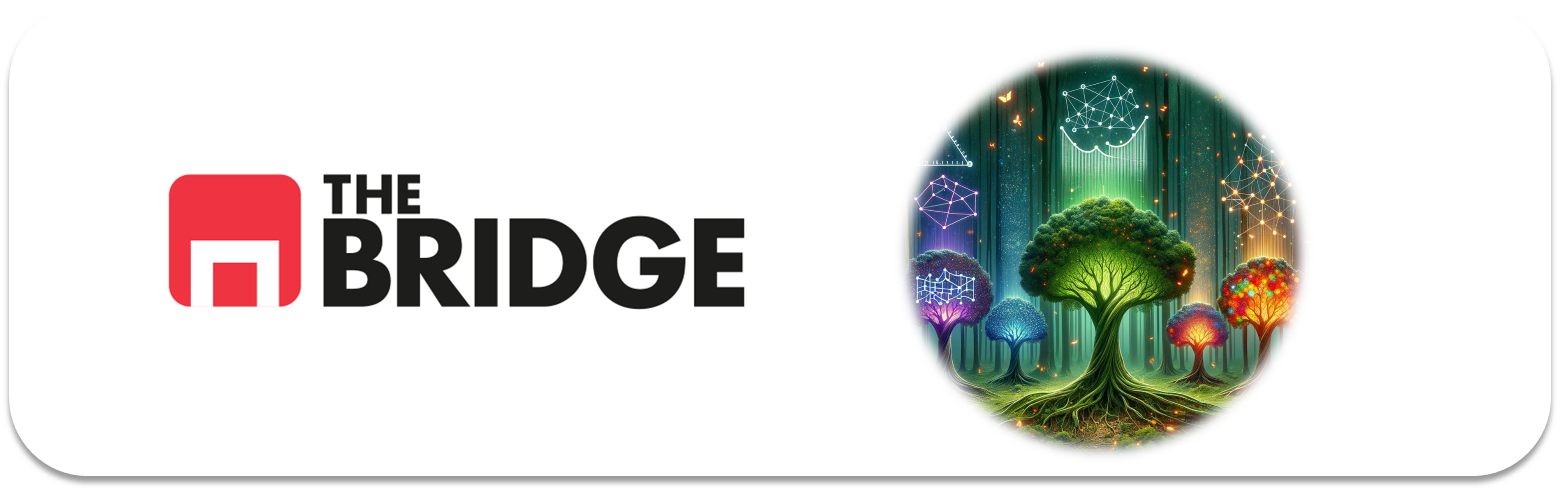

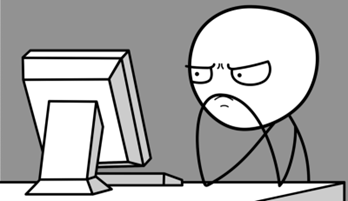

Para ejercitarte y afianzar lo aprendido sobre **Clasificacion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [7]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import seaborn as sns



In [2]:
from sklearn.datasets import make_moons

### Ejercicio 1

Genera un conjunto de datos de lunas usando 

```python
make_moons(n_samples=10000, noise=0.4)
```

La función make_moons se encuentra en el módulo `datasets` de `sklearn`. Juega con ella para ver qué tipo de datos genera, y  crea un X_moons y un y_moons. Visualiza las moons con un scatter plot de las dos features de X_moons. (ojo X_moons es un array de numpy de dos dimesiones para acceder a la primera X_moons[:,0] y para la segunda...)

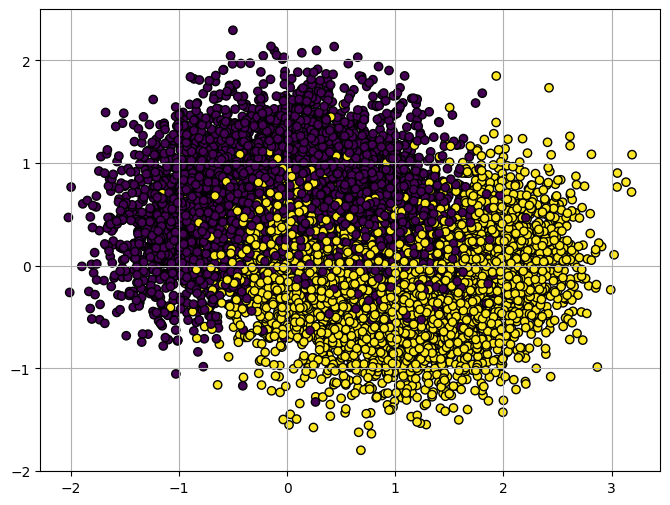

In [16]:
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4)

plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', edgecolor='k')
plt.grid(True)
plt.show()

<Axes: >

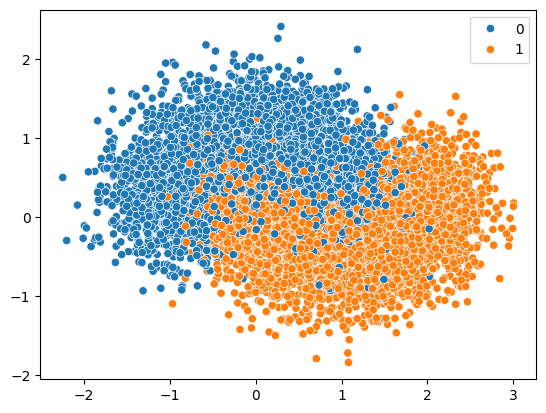

In [8]:
sns.scatterplot(x = X_moons[:,0], y = X_moons[:,1], hue = y_moons)

### Ejercicio 2

El objetivo de los modelos que vamos a ir construyendo es aprender a clasificar correctamente en cada "luna" (moon) a un punto dadas sus coordenadas. Para ello crea un par de juegos X,y para train y test al 20% de test a partir de los puntos generados en el ejercicio anterior.

In [11]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2,
                                                   random_state=42)

### Ejercicio 3

Instancia un árbol de decisión de `sklearn` sin añadir hiperparámetros.

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
moons_clf = DecisionTreeClassifier()


### Ejercicio 4

Entrena el árbol y evalúalo contra test, usa para ello el classification_report de `sklearn`

In [23]:
from sklearn.metrics import classification_report

In [24]:
moons_clf.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de test
y_pred = moons_clf.predict(X_test)

# 4. Evaluar el modelo con classification_report
reporte = classification_report(y_test, y_pred)

print("Reporte de clasificación del árbol de decisión:\n")
print(reporte)

Reporte de clasificación del árbol de decisión:

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       989
           1       0.82      0.80      0.81      1011

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



### Ejercicio 5

Instancia un nuevo árbol con los hiperparámetros (argumentos del constructor), `max_depth` a 5 y `max_leaf_nodes` a 15. Busca en la documentación de `sklearn` el significado de ambos hiperparámetros.

In [25]:
moons_tree_clf = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes= 15)

max_depth:
Limita la profundidad máxima del árbol.
Ayuda a evitar el sobreajuste al no permitir que el árbol crezca indefinidamente.
En este caso, el árbol solo podrá tener como máximo 5 niveles desde la raíz hasta una hoja.


max_leaf_nodes:
Restringe el número total de nodos hoja (nodos terminales que hacen predicciones).
El árbol se construye de forma "óptima" (greedy) para encontrar las 15 mejores divisiones.
También reduce el riesgo de sobreajuste, haciendo que el modelo sea más simple y generalizable.

### Ejercicio 6

Entrénalo, evaluálo contra test y muestra el resultado a través del classification_report.

In [26]:
moons_tree_clf.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de test
y_pred = moons_tree_clf.predict(X_test)

# 4. Evaluar el modelo con classification_report
reporte = classification_report(y_test, y_pred)

print("Reporte de clasificación del árbol de decisión:\n")
print(reporte)

Reporte de clasificación del árbol de decisión:

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       989
           1       0.87      0.86      0.86      1011

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



Comenta el resultado

*La mejor es sensible, debido a que el ajuste de hiperparámetros ha sido bastante bueno. En general los modelos basados en árboles necesitan un ajuste más fino que las regresiones (lineal, que apenas hay que hacer nada, y logística)*

### Ejercicio 7

Genera 1000 subconjuntos a partir del X_train, cada uno con 100 instancias seleccionadas aleatoriamente. Pista: Revisa la clase `ShuffleSplit` de `sklearn` para ayudarte con esto

In [27]:
from sklearn.model_selection import ShuffleSplit
import numpy as np

# Crear el objeto ShuffleSplit
splitter = ShuffleSplit(n_splits=1000, train_size=100, test_size=None, random_state=42)

# Generar los 1000 subconjuntos de entrenamiento
subconjuntos = []

for train_indices, _ in splitter.split(X_train):
    X_subset = X_train[train_indices]
    y_subset = y_train[train_indices]
    subconjuntos.append((X_subset, y_subset))

# Verificación
print(f"Número de subconjuntos generados: {len(subconjuntos)}")
print(f"Tamaño del primer subconjunto: {subconjuntos[0][0].shape[0]} instancias")

Número de subconjuntos generados: 1000
Tamaño del primer subconjunto: 100 instancias


### Ejercicio 8

Entrena un árbol de decisión por cada subconjunto anterior (ve acumulándolos en una lista, llámala "bosque" o "forest"). Emplea como hiperparámetros los del ejercicio 5.

In [28]:
# Lista donde guardaremos los 1000 árboles: nuestro "bosque"
forest = []

# Entrenar un árbol por subconjunto
for X_subset, y_subset in subconjuntos:
    arbol = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15)
    arbol.fit(X_subset, y_subset)
    forest.append(arbol)

# Verificación
print(f"Número de árboles en el bosque: {len(forest)}")

Número de árboles en el bosque: 1000


### Ejercicio 9

Evalua cada árbol del bosque contra X_test original en la métrica de `accuracy` y muestra la media de todas las medidas. Emplea para ello `accuracy_score` de `sklearn`. Comenta el resultado.

In [31]:


from sklearn.metrics import accuracy_score
accuracies = []

# Evaluar cada árbol en X_test
for tree in forest:
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Calcular la media de accuracy
media_accuracy = np.mean(accuracies)

# Mostrar resultado
print(f"Accuracy promedio de los 1000 árboles del bosque: {media_accuracy:.4f}")

Accuracy promedio de los 1000 árboles del bosque: 0.8090


*Como era un poco de esperar un árbol entrenado con menor cantidad de datos no está a la altura de otro entrenado sobre el mismo dataset pero con mayor cantidad de información (81% vs 86%). Es lo que se denomina weak_learner*

### Ejercicio 10

Vamos a hacer un consejo de árboles... Es decir ahora vuelve a predecir las instancias de X_test para cada árbol pero guarda las predicciones en una lista. Es decir crea una lista con los 1000 conjuntos de predicciones (uno por cada árbol)

In [32]:
predicciones_forest = []

# Obtener predicciones de cada árbol
for tree in forest:
    y_pred = tree.predict(X_test)
    predicciones_forest.append(y_pred)

print(f"Número de vectores de predicción guardados: {len(predicciones_forest)}")
print(f"Shape de una predicción: {predicciones_forest[0].shape}")

Número de vectores de predicción guardados: 1000
Shape de una predicción: (2000,)


### Ejercicio 11

Ahora vamos a construir la predicción final del consejo de árboles mediante un mecanismo de "hard-voting" es decir para cada predicción escoge la clase más votada. Puedes hacerlo recorriendo cada lista de predicciones y contando cual clase tiene más votos y apuntándolo o usando `mode` (la moda) de `scipy`

In [33]:
# Ejemplo de votación para la primera instancia de X_test
Y_pred_consejo = []
votos_0 = 0
votos_1 = 0
for i in range(n_trees):
    if predicciones_list[i][0] == 0:
        votos_0 += 1
    else:
        votos_1 += 1

if votos_0 > votos_1:
    Y_pred_consejo.append(0)
else:
    Y_pred_consejo.append(1)

NameError: name 'n_trees' is not defined

In [34]:
n_trees = len(predicciones_forest)
n_instancias = len(X_test)

Y_pred_consejo = []

# Votar para cada instancia de X_test
for j in range(n_instancias):
    votos_0 = 0
    votos_1 = 0
    for i in range(n_trees):
        if predicciones_forest[i][j] == 0:
            votos_0 += 1
        else:
            votos_1 += 1

    if votos_0 > votos_1:
        Y_pred_consejo.append(0)
    else:
        Y_pred_consejo.append(1)

In [36]:
import numpy as np
from scipy.stats import mode

# Convertir la lista a un array de shape (n_trees, n_test_instances)
predicciones_array = np.array(predicciones_forest)

# Calcular la moda a lo largo del eje de los árboles (votación)
Y_pred_consejo_mode = mode(predicciones_array, axis=0, keepdims=False).mode



### Ejercicio 12

Evalua las predicciones del consejo contra y_test y comenta el resultado. Utiliza `accuracy_score`

In [37]:
from sklearn.metrics import accuracy_score

# Usamos la predicción por votación mayoritaria (Y_pred_consejo)
accuracy_consejo = accuracy_score(y_test, Y_pred_consejo)

print(f"Accuracy del consejo de árboles (votación mayoritaria): {accuracy_consejo:.4f}")


Accuracy del consejo de árboles (votación mayoritaria): 0.8650
